### Question a - Draw decision boundaries

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

In [14]:
# X: each array in X corresponds to a training example, with 2 features x1 & x2
# y: labels of the training data
X = np.array([[1, 3], [1, 6], [2, 6], [3, 5], [4,1], [4, 3], 
              [4, 6], [7, 7], [8, 6], [8, 7], [8, 3]])
y = np.array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

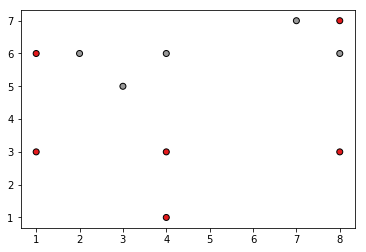

In [4]:
# plot points, without boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

In [5]:
def plot_decision_boundary(clf_name, clf, X, y):
    
    # the following snippet was borrowed from 
    # http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    # with some modifications 
    h= .02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(clf_name)
    plt.show()


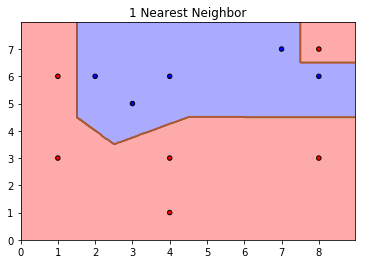

In [11]:
plot_decision_boundary("1 Nearest Neighbor", 
                       KNeighborsClassifier(n_neighbors=1), X, y)

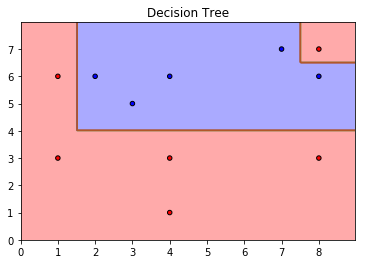

In [13]:
plot_decision_boundary("Decision Tree", 
                       DecisionTreeClassifier(), X, y)

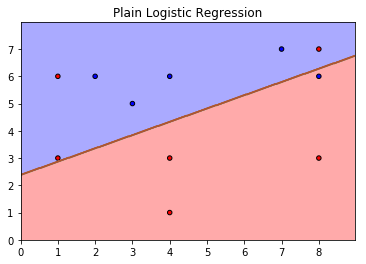

In [12]:
plot_decision_boundary("Plain Logistic Regression", 
                       LogisticRegression(), X, y)

#### For the cell below:
I could not find a way to plot Logistic Regression with quadratic terms with sklearn, so I plotted the SVC (C-Support Vector Classification) with the 'poly' kernel, it is not ideal but the boundary it generated is actually what I want to look like for the Logistic Regression boundary.

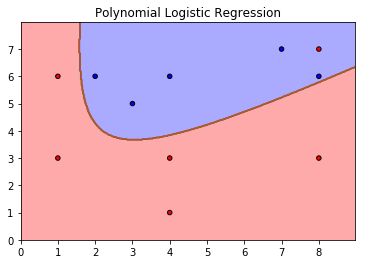

In [10]:
plot_decision_boundary("Polynomial Logistic Regression", 
                       SVC(kernel='poly', degree=2, C=1), X, y)

### Question b
Looking at the 4 decision boundaries above, one can see that 1-Nearest Neighbors, Decision Tree and Logistic Regression with Quadratic Term performed the best in classifying the dataset. However there are certain problems with these classifiers, namely:

- With larger data, 1-Nearest Neighbors can become expensive and slow, due to it being insensitive to outliers. Also, computing the euclidean distance takes time.
- With a much larger dataset that contains also a large number of features, a decision tree will become extremely huge and complex, with more and more splitting of the data => there are going to be situations where singleton = pure. This results in overfitting
- Logistic Regression with Quadratic terms is also very prone to overfitting, and hence cannot apply to the test set.

Of course, there are ways to work around the problem of overfitting, such as pruning and regularisation. But another way is to maybe combine different classifiers, at different stages, in order to save time and maintain performance, for instance:

- Apply plain/polynomial Logistic Regression or K Nearest Neighbors first, in order to get a rough decision boundary in the data.
- Decision Tree classification shall be applied now that the data has been split, as the number of tree splits from now on will not be as huge as it were if applying Decision Tree from the start. A benefit of using the Decision Tree is that it can always classify training examples perfectly, and for certain datasets this is valuable.
